# Importing libraries 

In [1]:
!pip install xgboost
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score 

plt.style.use('fivethirtyeight')
color_pal=sns.color_palette()

In [2]:
# reading the data 
df= pd.read_csv('PJME_hourly.csv')

# Business understanding 

in this analysis, we aim to predict hourly energy consumption based on historical data. Accurate forecasting of energy demand is critical for efficient energy management and grid stability. By analyzing past consumption patterns, this model helps utility companies anticipate future energy needs, optimize power distribution, and reduce operational costs. This will ultimately enable better decision-making for supply allocation and energy pricing, minimizing waste and ensuring sustainable energy usage. The insights gained from this prediction model can also support energy-saving initiatives and improve customer satisfaction through reliable service delivery.

# Explor data

In [3]:
df.head()
# df.tail()
#df.sample(10)

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [5]:
# set Datetime  as index
df= df.set_index('Datetime')

In [6]:
df.index=pd.to_datetime(df.index)

<Axes: title={'center': 'Energie'}, xlabel='Datetime'>

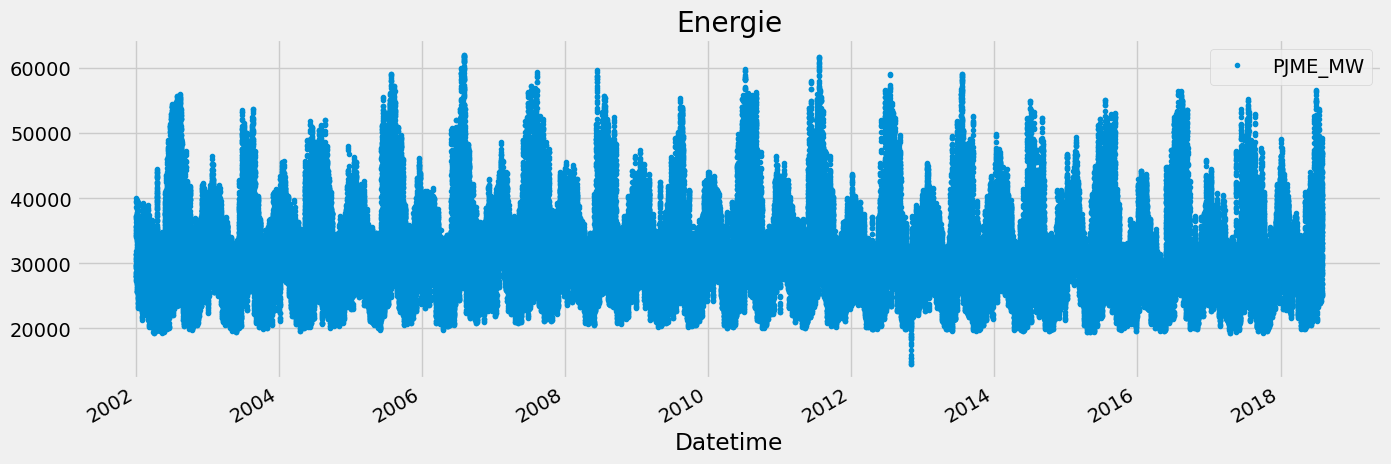

In [7]:
df.plot(figsize=(15,5),style='.',color=color_pal[0],
       title = 'Energie'
       )

# Creating new Features  

In [8]:
#hour dayofweek- month- quarter- year- dayofyear

In [9]:
df['hour']= df.index.hour
df['dayofweek']= df.index.dayofweek
df['month']= df.index.month
df['quarter']= df.index.quarter
df['year']= df.index.year
df['dayofyear']= df.index.dayofyear

In [26]:
df.head()

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365


PJME_MW      1.000000
hour         0.486303
dayofweek   -0.183058
month       -0.044522
quarter     -0.045276
year        -0.058505
dayofyear   -0.044028
Name: PJME_MW, dtype: float64

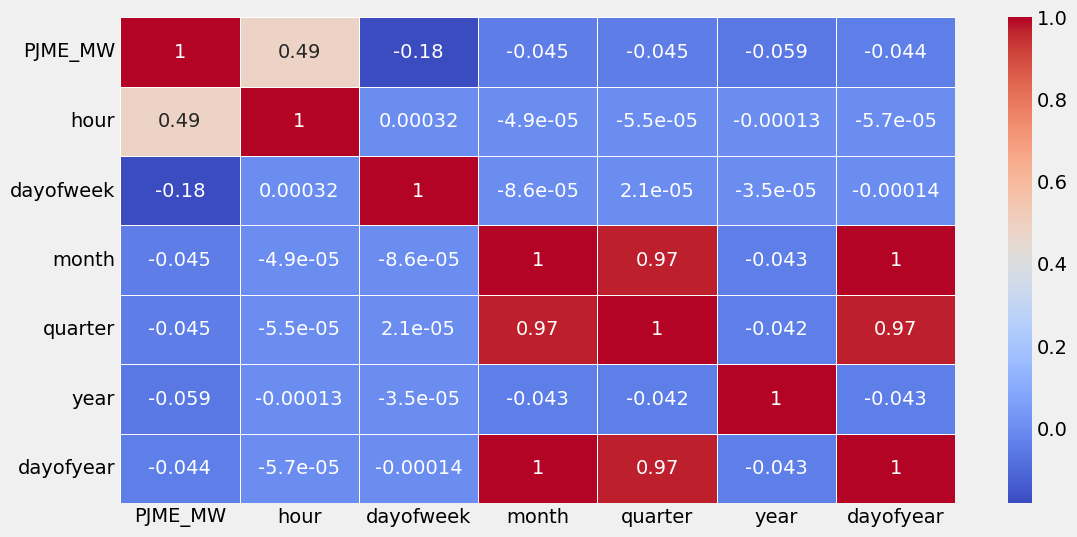

In [11]:
# check correlation between the features and the target variable 
# Check for numerical columns in the dataset
numerical_columns = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

corr_matrix['PJME_MW']

Since XGBoost handles feature importance and interactions well, I will include all the features in the training phase. The model will learn to weigh the relevant ones more heavily. After training, you can check feature importance to potentially remove unimportant features.

Text(0.5, 1.0, 'energy usage by Hour')

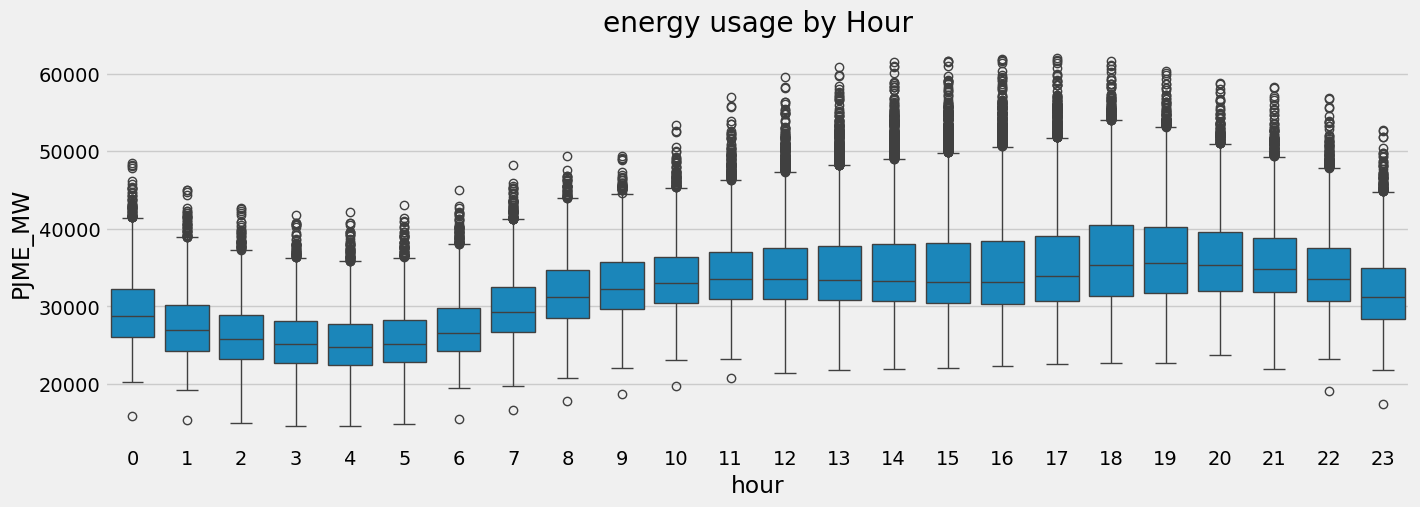

In [12]:
#  Explore hourly energie consumbtion 
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='hour',y='PJME_MW')
plt.title('energy usage by Hour')

Text(0.5, 1.0, 'energy usage by month')

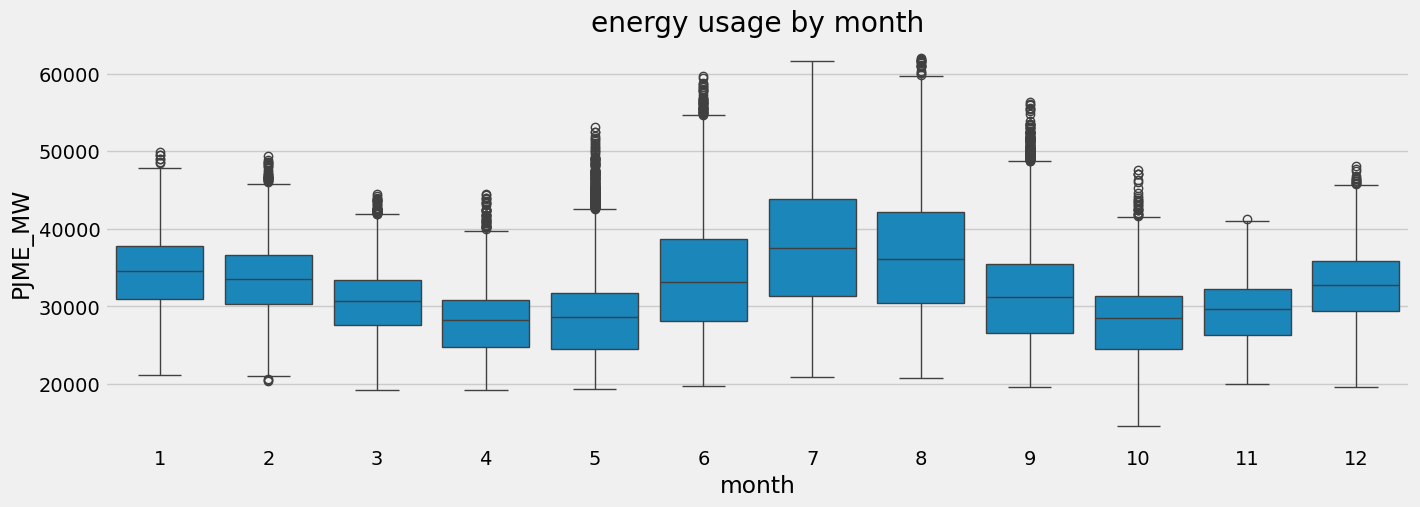

In [13]:
# Explore monthly energie consumbtion 
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='month',y='PJME_MW')
plt.title('energy usage by month')

Text(0.5, 1.0, 'energy usage by quarter')

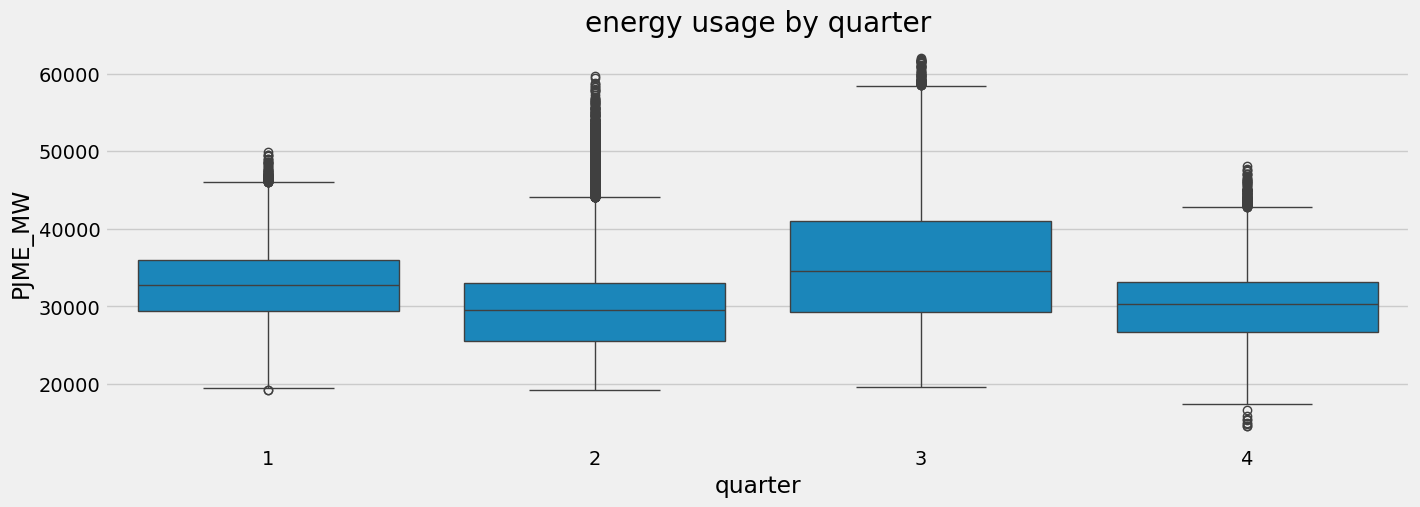

In [14]:
# Explore Quarterly energie consumbtion 
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='quarter',y='PJME_MW')
plt.title('energy usage by quarter')

# Modeling 

In [15]:
# spliting data into trainig and testing 
train_set=df.loc[df.index<'01-01-2015']
test_set=df.loc[df.index>='01-01-2015']

Text(0.5, 1.0, 'Train-Test sets')

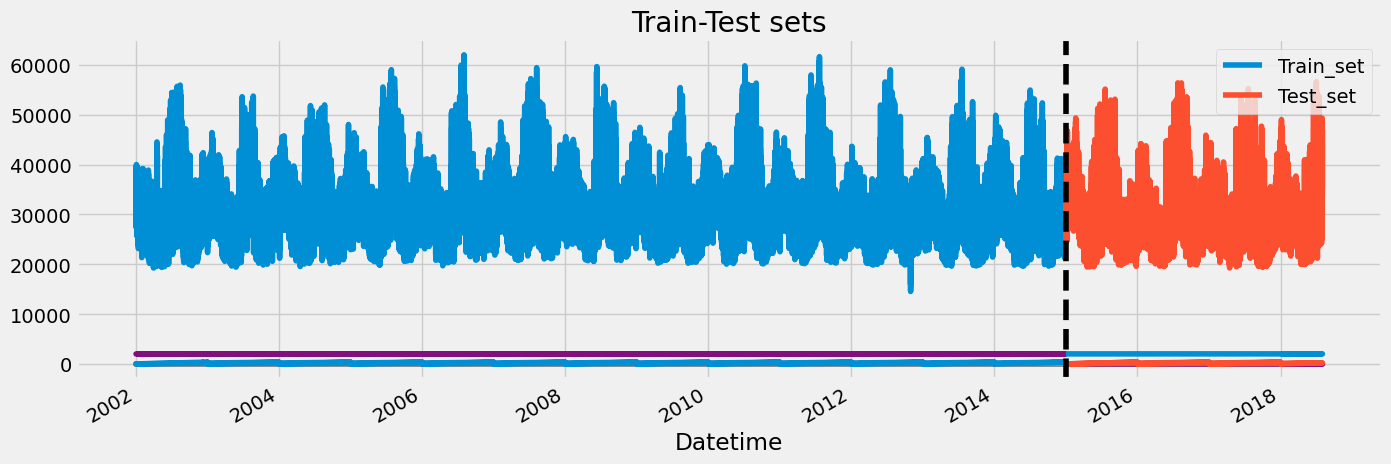

In [16]:
# visulization of test and train sets
fig,ax=plt.subplots(figsize=(15,5))
train_set.plot(ax=ax)
test_set.plot(ax=ax)
ax.axvline('01-01-2015',color='black',ls='--')
plt.legend(['Train_set','Test_set'])
plt.title('Train-Test sets')

In [17]:
# split test and train data into features and target variable
x_train=train_set.drop('PJME_MW',axis=1)
y_train=train_set['PJME_MW']
x_test=test_set.drop('PJME_MW',axis=1)
y_test= test_set['PJME_MW']

In [18]:
# create XGBoost model
XGB_model=XGBRegressor(n_estimator=1000,
                       early_stopping_round=50
                      )
        

In [19]:
# train the model 
XGB_model.fit(x_train,y_train)

C:\Users\mouda\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:47:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=1000,
             n_estimators=None, n_jobs=None, ...)

In [20]:
# how well the training was 
XGB_model.score(x_train,y_train)

0.9324661462266746

In [21]:
# make prediction
pre=XGB_model.predict(x_test)

# Evaluation 

In [22]:
# Evaluate the model XGBoost
mse_xgb = mean_squared_error(y_test, pre)
r2_xgb = r2_score(y_test, pre)
Sq_MSE_xgb= np.sqrt(mse_xgb)
print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost Squet_MSE: {Sq_MSE_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')

XGBoost MSE: 17586869.156182434
XGBoost Squet_MSE: 4193.67012963376
XGBoost R-squared: 0.5772251010793165


In [23]:
# array of predicted values 
pre

array([30878.986, 29885.408, 28764.014, ..., 35979.44 , 33564.727,
       31884.342], dtype=float32)

In [24]:
#converting predicted values into dataframe with the same test index 
pre_df = pd.Series(pre, index=test_set.index)

# Visualization and Conclusion 

Text(0.5, 1.0, 'Train-Test sets with Predicted Values')

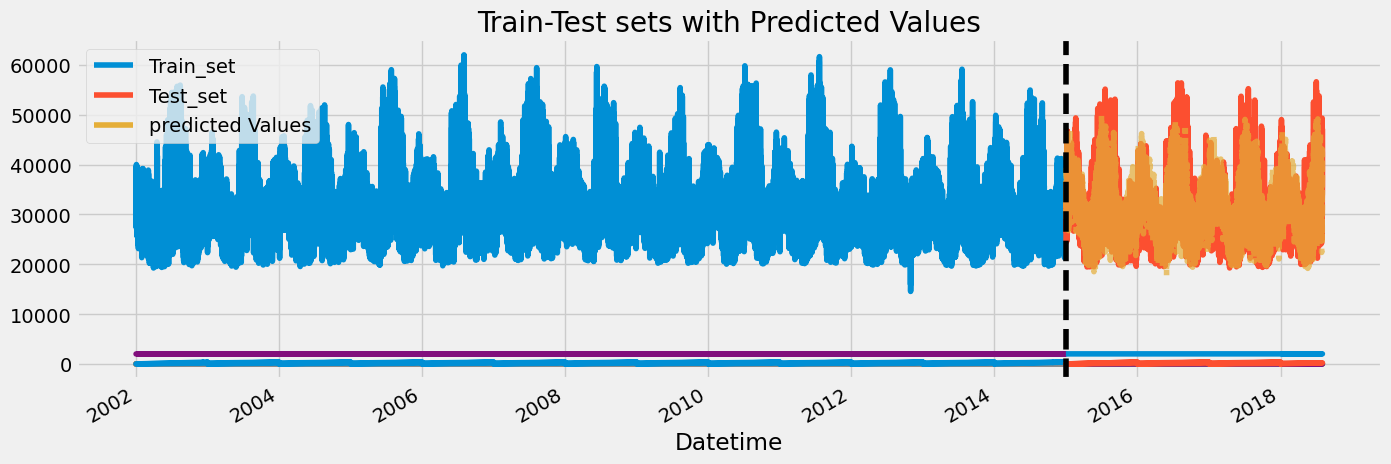

In [25]:
# Visiulization test/train/predicetd values
fig,ax=plt.subplots(figsize=(15,5))
train_set.plot(ax=ax)
test_set.plot(ax=ax)
pre_df.plot(ax=ax, label='Predicted Values', style=':', alpha=0.7)
ax.axvline('01-01-2015',color='black',ls='--')
plt.legend(['Train_set','Test_set','predicted Values'])
plt.title('Train-Test sets with Predicted Values')

conclusion:
R-squared of 0.577, indicating that it explains about 58% of the variance in energy consumption. However, the RMSE (4193.67) suggests there’s still room for improvement in terms of prediction accuracy, especially if the scale of energy consumption is not much higher than this. Fine-tuning hyperparameters or adding new features (like holidays or weather data) could potentially boost performance.